**Chapter 1 – The Machine Learning landscape**


Adapted From *Hands-on Machine Learning*, Aurélien Gueron (O'Reilly).

_This is the code used to generate some of the figures in chapter 1._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [2]:

# Numpy
import numpy as np
import numpy.random as rnd

#  Pandas
import pandas as pd

# Scikit learn imports for this NB (regression tools)
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#  Basic python modules
import os
import requests
import codecs
import io

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def url_to_content (url,encoding='utf-8',bufferize=False):
    r = requests.get(url)
    content_raw = r.content
    # Content downloaded by request is a byte string.  We're pretty sure this one has this encoding
    content = codecs.decode(content_raw,encoding=encoding)
    if bufferize:
        return io.StringIO(content)
    else:
        return content

# Load and prepare Life satisfaction data

Before starting this exercise you should create a folder called `datasets` in the folder where this notebook is stored.  We will be placing various data files in that folder, and the code below is written so as to look there.  We will be making various subfolders in the `datasets` folder, and if you want, you can start by 
creating the first one right away. It's called `lifesat`.

So let's say your data is stored in a Unix type system in the folder `/Users/fred/Desktop/school/python_for_ss`.  Then there is a subfolder of that called
`datasets` and a subfolder of **that** called `lifesat`.  So the full path to the `lifesat` data looks
like this.

```
/Users/fred/Desktop/school/python_for_ss/datasets/lifesat
```

The OECD (Organization for Economic Cooperation and Development) stats website  contains all kinds if economic statistics on countries in downloadable form, in particular in a very popular stripped-down spreadsheet format call ".csv" (for comma-separated values).  You will get a local copy.  The particular dataset we want is  the BLI data ("Better Life Index").  

It contains a number of economic and social variables used to estimate
"Quality of Life" in communities large and small.  Try this now so you can have a local copy of this data
Visit [here](http://stats.oecd.org/index.aspx?DataSetCode=BLI) and choose the year 2015 so you get numbers like the ones below.  Then pull down the export menu, and choose 
CSV format.  Download the file into a subfolder of the `datasets` folder called `lifesat`.

In [4]:


notebook_lifesat_url0 = 'https://github.com/gawron/python-for-social-science/blob/master/pandas/datasets/lifesat/'
lifesat_url = notebook_lifesat_url0.replace('github', 'raw.githubusercontent')
lifesat_url = lifesat_url.replace('blob/','')

def load_lifesat_data (lifesat_url):
    #notebook_lifesat_url0 = 'https://github.com/gawron/python-for-social-science/blob/master/pandas/datasets/lifesat/'
    #lifesat_url = notebook_lifesat_url0.replace('github', 'raw.githubusercontent')
    #lifesat_url = lifesat_url.replace('blob/','')
    oecd_file = 'oecd_bli_2015.csv'
    oecd_url= f'{lifesat_url}{oecd_file}'
    #oecd_bli_url0 = 'https://github.com/gawron/python-for-social-science/blob/master/pandas/lifesat/oecd_bli_2015.csv'
    return pd.read_csv(oecd_url, thousands=',',encoding='utf-8')

oecd_bli = load_lifesat_data(lifesat_url)
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

In the next cell we go through exactly the same processing steps we discussed for the data in the pandas module introduction part II notebook. To review the data, and the motivations for these steps,
please visit that notebook.

In the exercise ahead, we're going to take particular interest in the `Life satisfaction` score,  a kind of general "quality of life" or "happiness" score computed from a formula combining many of the indicators in this data. 

# Load, prepare, and merge the GDP per capita data

Elsewhere, on the world wide web, with help from Google, we find data about GDP  ("gross domestic product")
[here](http://goo.gl/j1MSKe).  Hit the download butten and place another csv file in the same
directory as the last data.

In [5]:
# Downloaded data from http://goo.gl/j1MSKe (=> imf.org) to github
def load_gdp_data ():
    gdp_file = "gdp_per_capita.csv"
    gdp_url = f'{lifesat_url}{gdp_file}'
    return pd.read_csv(gdp_url, thousands=',', delimiter='\t',
                                 encoding='latin1', na_values="n/a")
    
gdp_per_capita = load_gdp_data()
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
# Make "Country" the index column.  We are going to merge data on this column.
gdp_per_capita.set_index("Country", inplace=True)
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


Notice that when we did this merge, we lost some rows, in particular, countries for which we have GDP information, but no happiness stats.  Consider Cypress.

In [18]:
cyprus_gdp_per_capita  = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
cyprus_gdp_per_capita 

22587.49

But when we try to look up Cypress in the merged data, we get an error.  So as things stand now, we can't find out the quality of life score for Cypress.  We return to this problem below.

In [91]:
# This is a KeyError!
#full_country_stats.loc['Cyprus']

# Make a linear regression model

We are going to try to build a model that predicts life satisfaction from GDP.  The kind of model
we're going to use is called a **LInear Regression model**.

To start with, we are going to separate our country data into two sets, one set of countries which we use to train our model, and the other set which will be held back during training.  We call this second part of the data the **test set**.  We are going to ask our model to try to **predict** the life satisfaction of the test countries.  Let's choose 7 countries for the test, and since we have our countries sorted by GDP, let's pick 3 countries from the low end and 3 countries from the high end to test on.

In [111]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

#Train on this!
sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#Test on this!
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

In [21]:
sample_data.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


It's pretty easy to show that a model like this has some potential for making accurate predictions.

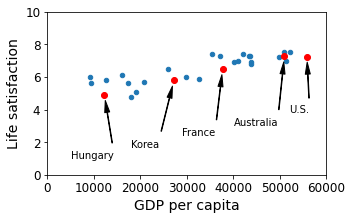

In [112]:
# Scatter all the points, using the pandas DF plot method.
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
# GDP 0-60K X-axis. LifeSat 0-10 Y-axis
plt.axis([0, 60000, 0, 10])
# Text positions need some eyeballing, and so are entered by hand. x = left edge of text
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    # Make these points red circles
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.show()

As the GDP grows the Life satisfaction grows.  Over on the right, the life satisfaction of the US isn't quite where we'd expect it to be.  Although the US has higher GDP than Australia, its life satisfaction trails behind.  But all in all, it's a pretty strong trend.  More money equals more happiness.

In [10]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


## Doing it by hand

Let's try to draw some lines that capture the trends, just using our eyeballs.  Here are some attempts.  $\theta_{0}$ is where the line intersects the y-axis; $\theta_{1}$ is its slope.

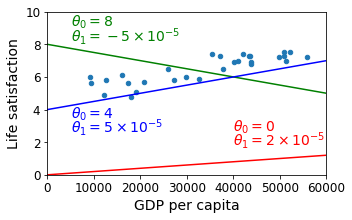

In [113]:
#import numpy as np

# The data
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)

# red line
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")

# green line
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")

# blue line
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")

# Let's have this cell return nothing.  Just a display cell.
None

The blue line isn't bad.  Maybe we can do better if we use some math. 

## The sklearn linear regression module

We load up the `sklearn` linear regression module and ask it to find the line that best fits our sample data.  What it computes is 
two numbers, the intercept (of the y-axis) and the slope.

In [114]:


#Data
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]

#Create model
lin1 = linear_model.LinearRegression()
#Train model on data
lin1.fit(Xsample, ysample)

# Here's the result of the learning.
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.853052800266435, 4.911544589158485e-05)

Notice creating a `linear_model` produced a python object called `lin1`.  That's what we run the `fit` method on.  This method "fits" the model to the data.
After fitting, the `lin1` object has two numbers called the `intercept` and the `coefficient`.  These are the slope and
intercept of a line.

We draw our data again with the line defined by the slope and intercept. Pretty good fit, eyeballing it.

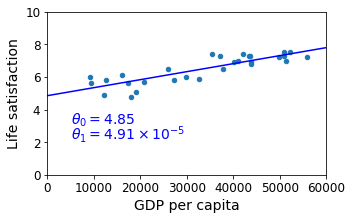

In [115]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
None


First, let's try to predict the `Life Satisfaction` for a country we know the GDP of, which is missing from our
quality of life data, `Cypress`.

What we do is plug the GDP for Cypress into the model using the `predict` method, and it returns the predicted
`Life Satisfaction` score, which is 5.96 or so.

In [26]:
# What we plug in
cyprus_gdp_per_capita 

22587.49

In [116]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
#print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0][0]
# What we get out
cyprus_predicted_life_satisfaction

5.962447443188149

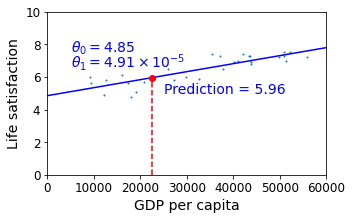

In [117]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), s=1)
X=np.linspace(0, 60000, 1000)

# Plot the line our linear regression model learned.
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")

# Plot a vertical red dashed line where the GDP of CYPRESS is. 
# It goes from the x axis right up to where our predicted happiness is.
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")

plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
# Plot a fat red dot right where our predicted happiness is
# Notice it lands right on the line, and it has to, because our model just is the line.
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
plt.show()

Look at the sample data that has around the same GDP as Cypress.

In [16]:
sample_data[7:10]

,GDP per capita,Life satisfaction
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


Suppose we try to predict our life satisfaction by taking the average of these 3 points.

In [17]:
(5.1+5.7+6.5)/3

5.766666666666667

So you can see this estimate is lower than the 5.96 estimated by our model.  This is because the linear model tries for the best line that fits **all** the points, so it responds to the fact that there is a steady upward
trend with a particular slope, and because Spain falls below that line, it is treated as a point whose value has been reduced by **noise**. 

So far, so good.  But what we really need to do is TEST our model on some data it didn't see during
training, but for which we know the answers.  That was the point of setting aside some test data.

In [106]:
missing_data

,GDP per capita,Life satisfaction,sq_err_poly,sq_err_lin
Country,,,,
Brazil,8669.998,7.0,9.875693e+00,2.962242
Mexico,9009.280,6.7,5.962920e-01,1.972487
Chile,13340.905,6.7,2.364837e-01,1.420155
Czech Republic,17256.918,6.5,1.558389e+00,0.638986
Norway,74822.106,7.4,4.933990e+17,1.272325
Switzerland,80675.308,7.5,6.452939e+19,1.730426
Luxembourg,101994.093,6.9,3.361185e+25,8.776632


In [109]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

The cell below compares two models, the one we used before (the dotted blue line), trained on our data sample,
and another model trained on all the data (the solid black line).  The significant difference
between these models suggests **either** that the points we trained on before are not all that representative of the
entire data set **or** our test points are outliers (they sort of are if you look back at how we chose them) **or** that there are things going on that can't be captured by a  linear model.  Call the first two possibilities sampling issues; either the training data was chosen poorly or the test data was chosen poorly.

See if you can understand the code below.  The red squares are the true locations of our test points.
The dot on the dotted blue line that lies 
directly above or below the red square is its predicted
value according to the model we trained before. If the red square lands directly on the blue line, the model
got it it exactly right.  If the red square is some distance above the line (like "Brazil"),
the model's estimate is low; if the red square is some distance below the blue line (like "Luxembourg"),
the model's estimate is high.  Which of the following statements about **the dotted blue
line** do the red dots provide evidence for?

  1.  The blue model underestimates the happiness of poor countries.
  2.  The blue model overestimates the happiness of poor countries.
  3.  The blue model underestimates the happiness of rich countries.
  4.  The blue model overestimates the happiness of rich countries.

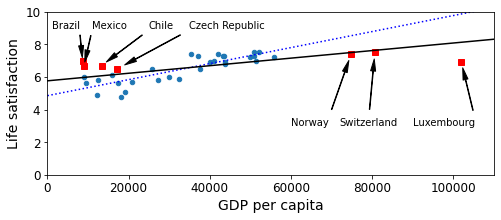

In [118]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
# Plot the dash blue line
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = linear_model.LinearRegression()
# np.c_ being used here to turn 1D arrays (n,) into 2D (n,1)
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
# Plot the black line
plt.plot(X, t0full + t1full * X, "k")

plt.show()

# Other models

The next cell has some code computing a complicated model, one which does not have to be a line.
It is a higher order polynominal model which can curve up and down to capture all the data
points.  We can measure the aggregate error of a model by computing the distance of each actual point from
the curve/line of the model. By that definition,  the polynomial model
is reducing the "error" on the training set by a large amount.   But is it a better model?
Only the performance on a test set will tell us for sure.

Note:  The machine learning toolkit demoed here (`scikit_learn`) has a variety of robust regression
strategies implemented; see [Scikit learn docs](https://scikit-learn.org/stable/auto_examples/linear_model/plot_robust_fit.html#sphx-glr-auto-examples-linear-model-plot-robust-fit-py) for discussion.


**Pipeline**

We choose a degree, the highest exponent in the polynomial function we will use to make
predictions.  Below we choose 60.

1.  Polynomial features. Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree k. For example, if an input sample is two dimensional and of the form [a, b] (say using the two features GDP and employment), the degree-2 polynomial features are [$1, a, b, a^2, ab, b^2$].  
    What this notation means is that the model has to learn coefficients or **weights** to associate with each of these values such that when the following polynomial is summed, it gets as close as possible to the real life-satisfaction value:
    
    $$w_{1} + w_{2}a + w_{3}b + w_{4}a^{2} + w_{5}ab + w_{6}b^2$$
    
    These polynomial models have a lot of numbers to learn. For a 1-dimensional input model (one feature, GDP, in our case) and k=60, the model will compute 60 new feature values [1, a^2, ..., a^60] and need to learn weights for all of them.  If we used employment in addition to GDP, it would be a lot more.

2.  Scaler.  The standard scaler maps each feature value x onto z where

    $$
    z = (x - \mu) / s
    $$
    
    where $\mu$ is the mean of the feature and $s$ is the standard deviation.  As we saw in the pandas module this is known as centering and scaling. This eliminates the possibility of over- or uinder- valuing features with large/small value ranges. 
    
3.  With the new features we still do a linear regression, just in a much higher dimensional space. In other words, the learning computation in the example depicted below is exactly the same as if we had 60 independent features instead of 1 value we had raised to 60 different powers.  In both cases it's a linear model.  In both cases, we seek to learn 60 weights that define a hyper plane that provides the least squared error solution. When we plot the predicted values our 60D "linear" model finds for our data using the original data GDP feature as the X coordinate,  the predicted Life Satisfaction value is a sinuous curve.
    
Note:  This is a pretty silly example but we use it to illustrate a simple point.  With a model 
with enough parameters (each of those Polynomial features gets its own coefficient), you can fit
anything.

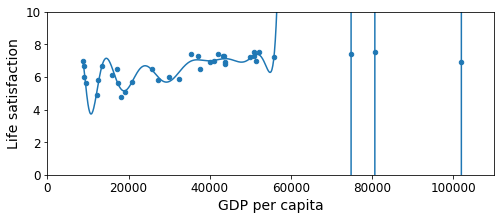

In [84]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])



poly = preprocessing.PolynomialFeatures(degree=20, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
# Train on the full GDP dataset for the sake of the picture
pipeline_reg.fit(Xfull, yfull)

# Pass in a large set of sample GDP values from poor to rich
#X = np.linspace(0, 110000, 1000)
X = np.linspace(Xfull.min(), 110_000,1_000)
# predict expects a 2D array.  Make our 1D array X a 1000x1 2D array
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.show()

So this model **really** minimizes mean squared error.  It pretty much
threads the curve through every point.

But that's every point of the data set.  What about unseen data?

Let's evaluate by compoating the mean squared error of the
polynomial and linear model when both are trained on the sample
(with 6 outliers removed).

In [69]:
pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
# Now Train on the sample dataset
pipeline_reg.fit(Xsample, ysample)

# Polynomial Model
vals_poly = pipeline_reg.predict(missing_data["GDP per capita"].values[:,np.newaxis])
# Compare predicted values to actual values
poly_mse = mean_squared_error (vals_poly[:,0], missing_data["Life satisfaction"])

# Linear Model
vals_lin = lin1.predict(missing_data["GDP per capita"].values[:,np.newaxis])
lin_mse = mean_squared_error (vals_lin[:,0], missing_data["Life satisfaction"])

And now the results, with a fluorish:

In [128]:
print(f' Lin Model MSE: {lin_mse:.3e}')
print(f'Poly Model MSE: {poly_mse:.3e}')

 Lin Model MSE: 2.682e+00
Poly Model MSE: 4.802e+24


The mean squared error of the polynomial model is crazy bad!

The mean squared error of the linear model is pretty reasonable!

To look into this, let's cook up a squared error function so as to look at the numbers
before their mean is taken.

In [85]:
def get_squared_error(predicted, actual):
    return (predicted - actual)**2

In [119]:
se_poly = get_squared_error (vals_poly[:,0], missing_data["Life satisfaction"])
# Save this to look at later.  
missing_data['sq_err_poly'] = se_poly
# Now take the mean of squared error (to compare with sklearn function)
mse_poly = se_poly.mean()
mse_poly

4.801701719851432e+24

In [129]:
# Same for the linear model
se_lin = get_squared_error (vals_lin[:,0], missing_data["Life satisfaction"])
# Save this too look at later
missing_data['sq_err_lin'] = se_lin
# Get the mean of squared error
mse_lin = se_lin.mean()
mse_lin

2.6818932487474667

What happened?

Here is our data with squared errors from the models appended.

In [130]:
#  Think about why the squared error columns are so nicely aligned with the original data
#  What Python type does get_squared_error error return?
missing_data

,GDP per capita,Life satisfaction,sq_err_poly,sq_err_lin
Country,,,,
Brazil,8669.998,7.0,9.875693e+00,2.962242
Mexico,9009.280,6.7,5.962920e-01,1.972487
Chile,13340.905,6.7,2.364837e-01,1.420155
Czech Republic,17256.918,6.5,1.558389e+00,0.638986
Norway,74822.106,7.4,4.933990e+17,1.272325
Switzerland,80675.308,7.5,6.452939e+19,1.730426
Luxembourg,101994.093,6.9,3.361185e+25,8.776632


What happened was on the three rich countries (Norway, Switzerland, and Luxembourg) 
the squared error skyrocketed for the polynomial model.

Looking back at the original picture of the polynomial model
points to the source of the problem. The curve of the polynomial model is swinging wildly
up and down in order to thread its way through the lifesat scores for richer countries.

We can confirm the model's upward swing without the outliers by drawing a picture of prediction for a model trained on just the sample without the last three points.

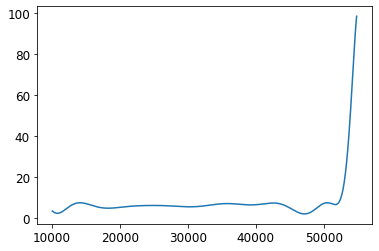

In [131]:
pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
# Train on the full GDP dataset for the sake of the picture
pipeline_reg.fit(Xsample, ysample)

# Pass in a large set of sample GDP values from poor to rich
X = np.linspace(Xsample.min()+1000, Xsample.max()-1000, 1000)
# predict expects a 2D array.  Make our 1D array X a 1000x1 2D array
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.show()

The polynomial model  minimized the squared error on whatever training set it was given but 
it missed the general trend.
As a result, it performed terribly on unseen data.  This is known as **overfitting** or **overtraining**.

This is the danger of very powerful models.   In basically memorizing the training set, they
sometimes fail to learn the key generalization that will help cope with unseen data.

## Wrapping up

 We'll conclude with some general regression tips and some sample regression code,
 to help you explore the different kinds of regression models scikit learn offers.
 
 1.  Choose your features wisely.
 2.  Learn about smoothing and regularization.
 3.  Explore (cautiously) models of regression other than linear.

## Choosing features

Regression always starts with choosing features to predict with.  Don't skip this step.  Don't
just always use all the features in your data set.  More isn't necessarily better.

Here's an interesting observation about the training data, which a model might "notice" if we had features that represented the letters in the country name.  Let's consider all countries with a "w" in their name:

In [22]:
full_country_stats.loc[[c for c in full_country_stats.index if "W" in c.upper()]]["Life satisfaction"]

Country
New Zealand    7.3
Sweden         7.2
Norway         7.4
Switzerland    7.5
Name: Life satisfaction, dtype: float64

Every single one of them has life satisfaction score of over 7!  This is fairly high.  If this were represented in our
data, a learner would certainly pick up on it, and treat it as a feature that increases the likelihood
of happiness. Yet it is fairly clear that this is just an accidental feature of our data that will
not generalize to other cases.

This example shows how poorly chosen features can hurt.  They introduce noise that can be mistaken
for meaningful patterns.  We note that this feature does not correlate particularly well with GDP in the GDP
table, which has a larger sample of countries, and we know that very low GDP makes a high life satisfaction score
virtually impossible (because many of the features used to compute the score depend on wealth).  

In [23]:
# Let's just look at one column of this largish table
gdp_col = gdp_per_capita["GDP per capita"]
gdp_col.loc[[c for c in gdp_col.index if "W" in c.upper()]].head()

Country
Botswana        6040.957
Kuwait         29363.027
Malawi           354.275
New Zealand    37044.891
Norway         74822.106
Name: GDP per capita, dtype: float64

Note that relatively poor Botswana and Malawi are "W"-countries.  This confirms our suspicion that the W "rule" is actually an accident of our sample.

## Ridge learning (regularization)

Model building is all about making reasonable generalizations, which in turn is about wisely choosing which patterns in the data will be used to make those generalizations.

One very important kind of constraint on generalization is called smoothing or regularization.  This is a family of techniques used to used to discourage 
"extreme" models, for example, models that forbid certain kinds of patterns because they were never seen in the training sample.  Without going into the details here, the picture below shows the intended behavior of regularization, using a case in which it works well.  The dashed red line shows a model trained on all the data.  For the time being, think of this as the right answer.  The dotted blue line shows the model trained on our original training sample, which as we noted before, was not entirely representative of the data.  At the GDP extremes, that model drifts quite far from the "right" answer.  The solid blue line is the same kind of model trained on the same sample data, but with "ridge" regularization, which penalizes models with many high coefficients; in this case it will help reduce the slope of the line, while still requiring it to reduce the error on the training data.

The result is the solid blue line, which is closer to the "right" answer than
the original linear regression model.  Note:  *this example is a somewhat oversimplified attempt to convey the intuition of what regularization does.  One wouldn't normally use ridge regression in a case where there's a single predictor variable, because what makes it useful is that it reduces the influence of features that account for less of the variance.*


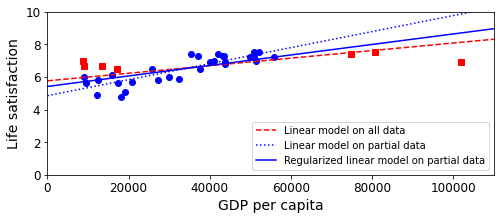

In [24]:
plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.show()

## Example modeling code

The code below is for you to use when implementing new kinds of models using `scikit_learn`.  It trains a new kind of prediction model, called a `k-
neighbors model`.  It makes use of the work we did before, so if you're fresh here, you'll
have to execute all the cells above.

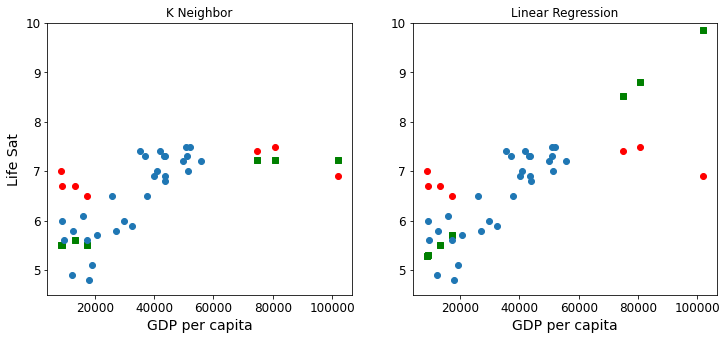

In [133]:

backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    """
    This would normally do prep work,including the train test split.
    For niw Just returning the training data.
    """
    return sample_data

# Code example
########################################################################
from sklearn import neighbors

# Load the data code goes here
# We loaded it above.


# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

# The np.c_ makes both X and y  2D arrays
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

#######################################################################
#
#   Training
#
########################################################################

# Select and train a k-neighbors regression model, supplying values for important parameters
k_neigh_reg_model = neighbors.KNeighborsRegressor(n_neighbors=3)
# Train the model (always the .fit() method in sklearn)
k_neigh_reg_model.fit(X, y)
# select and train a linear regression model
lin_reg_model3 = linear_model.LinearRegression()
lin_reg_model3.fit(X, y)

#######################################################################
#
#   Testing
#
########################################################################

#. Get test data
Xm,Ym = missing_data._values[:,0],missing_data._values[:,1]
# Use models to predict y vals on test data.
Yp = k_neigh_reg_model.predict(Xm[:,np.newaxis])
Yp3 = lin_reg_model3.predict(Xm[:,np.newaxis])

#######################################################################
#
#   Plotting
#
########################################################################

# Set up a figure 
f = plt.figure(figsize=(12,5))
#  Add 2 plots side by side
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

#######################################
# Model 1 plot
#######################################
# Put test points in plot, color red
ax.scatter(Xm, Ym, c="r",marker="o")
# Put  predicted test points in plot color grren
ax.scatter(Xm, Yp, c="g",marker="s")
# Put training data in plot; let matplotlib choose the color.
# It will choose a color not yet used in this axis.
ax.scatter(X,y)
# plot parameters
ax.set_ylim([4.5,10])
ax.set_title('K Neighbor')
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Life Sat')

#######################################
# Model 2 plot
#######################################
ax2.scatter(Xm, Ym, c="r",marker="o")
ax2.scatter(Xm, Yp3, c="g",marker="s")
ax2.scatter(X,y)
# plot parameters
ax2.set_ylim([4.5,10])
ax2.set_xlabel('GDP per capita')
ax2.set_title('Linear Regression')

# Not usually needed in a NB but okay
plt.show()
########################################################################

oecd_bli, gdp_per_capita = backup

In both graphs, the blue points are the training data and the red points are the test data.
The green points are the predicted locations of the red points (using the GDP, the x-value, to predict the Life Satisfaction, the y-value).  Comparing the red points with the blue training data points, we see the test points are distinct outliers.   

In the linear regression graph, as expected, the green points lie on a line chosen based on the blue points, the training data.   The predicted K Neighbor model points do not lie on a line.  K Neighbor is a more powerful, more flexible model and does a better job predicting here, in the sense that there is less spread between the red and green points.  Despite the fact that the training data lacks high GDP countries, the K Neighbor model seems to capture the fact that life satisfaction levels off with GDPs above 60K.

Because the data does not lie on a line, the linear model ends up having two flaws.  It underestimates the life satisfaction of poor folks in the test set, and overestimates that of rich folks. 